<a href="https://colab.research.google.com/github/Jose1995-S/CANVIA/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np # Algebra lineal
import pandas as pd # Procesamiento de datos, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualización de datos
import seaborn as sns # Visualización de datos estadísticos
import plotly.graph_objects as go # Trazar objetos gráficos
import warnings # Manejar mensajes de advertencia
warnings.filterwarnings('ignore') # Ignorar mensajes de advertencia

In [57]:
#Cargamos la data
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [58]:
#Comprobar el nombre de las columnas
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [59]:
#Comprobando la forma de los datos
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 8807 rows and 12 columns


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [62]:
#Comprobando los valores nulos en el conjunto de datos
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

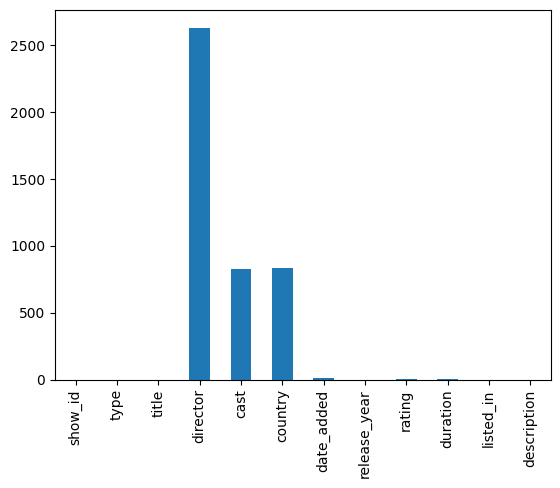

In [63]:
df.isnull().sum().plot(kind='bar')

In [64]:
# Eliminar los valores faltantes del DataFrame
netflix=df.dropna()

# Después de eliminar los valores faltantes, verifique la forma de los datos.
print(f'The dataset contains {netflix.shape[0]} rows and {netflix.shape[1]} columns')

The dataset contains 5332 rows and 12 columns


In [65]:
# Comprobando los valores duplicados en los datos.
duplicate_values=df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


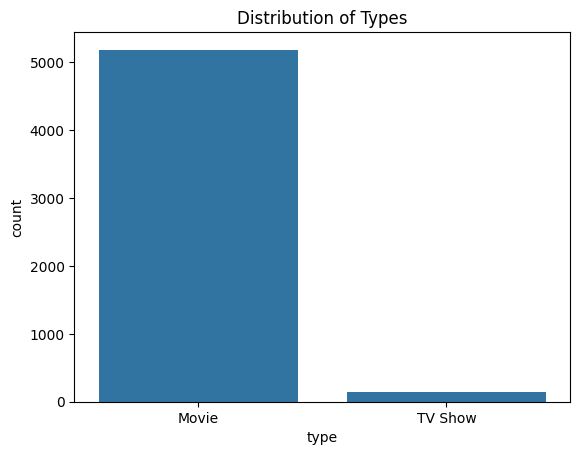

In [77]:
# Cree un gráfico de recuento para la columna 'tipo'
sns.countplot(data=netflix, x='type')

# Establecer el título de la trama.
plt.title('Distribution of Types')

# Display the plot
plt.show()

In [72]:
# Select rows where 'type' is 'Movie'
movie = netflix[netflix['type'] == 'Movie']

In [73]:
# Remove 'min' suffix from values in the 'duration' column and convert to integers
movie['duration'] = movie['duration'].str.replace(' min', '').astype(int)

In [74]:
# check data types of movie duration
print(movie['duration'].dtype)

int64


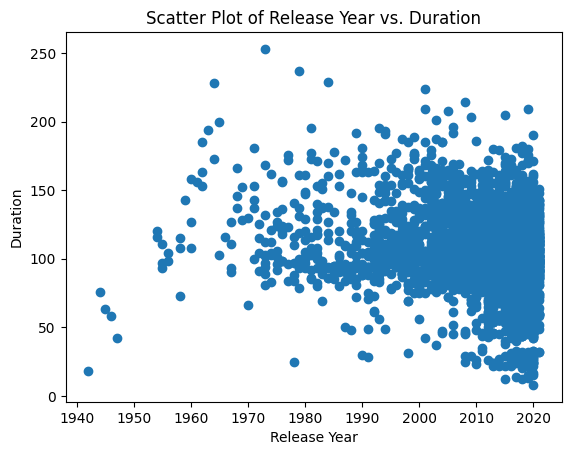

In [75]:
# Create a scatter plot of 'release_year' versus 'duration'
plt.scatter(movie['release_year'], movie['duration'])

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Scatter Plot of Release Year vs. Duration')

# Display the plot
plt.show()